In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import missingno as msno
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
pd.options.display.max_columns = 999
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn-bright')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


**Quick look**

In [2]:
df = pd.read_csv("../input/data.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.head(5)

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   
4  Aug 30, 2015         NaN                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     

In [3]:
columns_to_drop = ['ID', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until', 'LS',
                   'ST', 'RS', 'LW', 'LF', 'CF','RF', 'RW', 'LAM','CAM','RAM', 'LM',
                   'LCB', 'CB', 'RCB', 'RB', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB','Flag', 'Club Logo']
df.drop(columns_to_drop, inplace=True, axis=1)


In [4]:
df.head(5)

Name  Age                                           Photo  \
0           L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   
1  Cristiano Ronaldo   33   https://cdn.sofifa.org/players/4/19/20801.png   
2          Neymar Jr   26  https://cdn.sofifa.org/players/4/19/190871.png   
3             De Gea   27  https://cdn.sofifa.org/players/4/19/193080.png   
4       K. De Bruyne   27  https://cdn.sofifa.org/players/4/19/192985.png   

  Nationality  Overall  Potential                 Club    Value   Wage  \
0   Argentina       94         94         FC Barcelona  €110.5M  €565K   
1    Portugal       94         94             Juventus     €77M  €405K   
2      Brazil       92         93  Paris Saint-Germain  €118.5M  €290K   
3       Spain       91         93    Manchester United     €72M  €260K   
4     Belgium       91         92      Manchester City    €102M  €355K   

   Special Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0     2202           Left                       5.0        4.0          4.0   
1     2228          Right                       5.0        4.0          5.0   
2     2143          Right                       5.0        5.0          5.0   
3     1471          Right                       4.0        3.0          1.0   
4     2281          Right                       4.0        5.0          4.0   

        Work Rate   Body Type Position  Jersey Number Height  Weight  \
0  Medium/ Medium       Messi       RF           10.0    5'7  159lbs   
1       High/ Low  C. Ronaldo       ST            7.0    6'2  183lbs   
2    High/ Medium      Neymar       LW           10.0    5'9  150lbs   
3  Medium/ Medium        Lean       GK            1.0    6'4  168lbs   
4      High/ High      Normal      RCM            7.0   5'11  154lbs   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     87.0       88.0   
2      79.0       87.0             62.0          84.0     84.0       96.0   
3      17.0       13.0             21.0          50.0     13.0       18.0   
4      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
0   93.0        94.0         87.0         96.0          91.0         86.0   
1   81.0        76.0         77.0         94.0          89.0         91.0   
2   88.0        87.0         78.0         95.0          94.0         90.0   
3   21.0        19.0         51.0         42.0          57.0         58.0   
4   85.0        83.0         91.0         91.0          78.0         76.0   

   Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  \
0     91.0       95.0     95.0       85.0     68.0     72.0      59.0   
1     87.0       96.0     70.0       95.0     95.0     88.0      79.0   
2     96.0       94.0     84.0       80.0     61.0     81.0      49.0   
3     60.0       90.0     43.0       31.0     67.0     43.0      64.0   
4     79.0       91.0     77.0       91.0     63.0     90.0      75.0   

   LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0       94.0        48.0           22.0         94.0    94.0       75.0   
1       93.0        63.0           29.0         95.0    82.0       85.0   
2       82.0        56.0           36.0         89.0    87.0       81.0   
3       12.0        38.0           30.0         12.0    68.0       40.0   
4       91.0        76.0           61.0         87.0    94.0       79.0   

   Composure  Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0       96.0     33.0            28.0           26.0       6.0        11.0   
1       95.0     28.0            31.0           23.0       7.0        11.0   
2       94.0     27.0            24.0           33.0       9.0         9.0   
3       68.0     15.0            21.0           13.0      90.0        85

**Missing data**

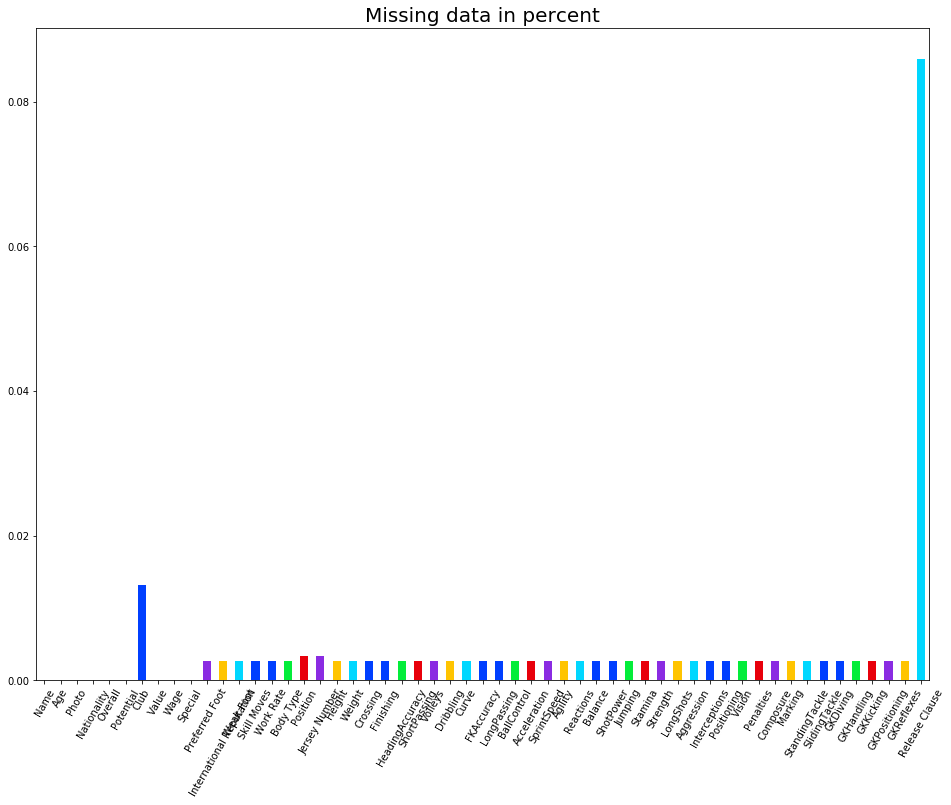

In [5]:
null = df.isnull().sum()/df.shape[0]
plt.figure(figsize=(16,12))
null.plot.bar()
plt.title('Missing data in percent', fontsize=20)
plt.xticks(rotation=60)
plt.show()

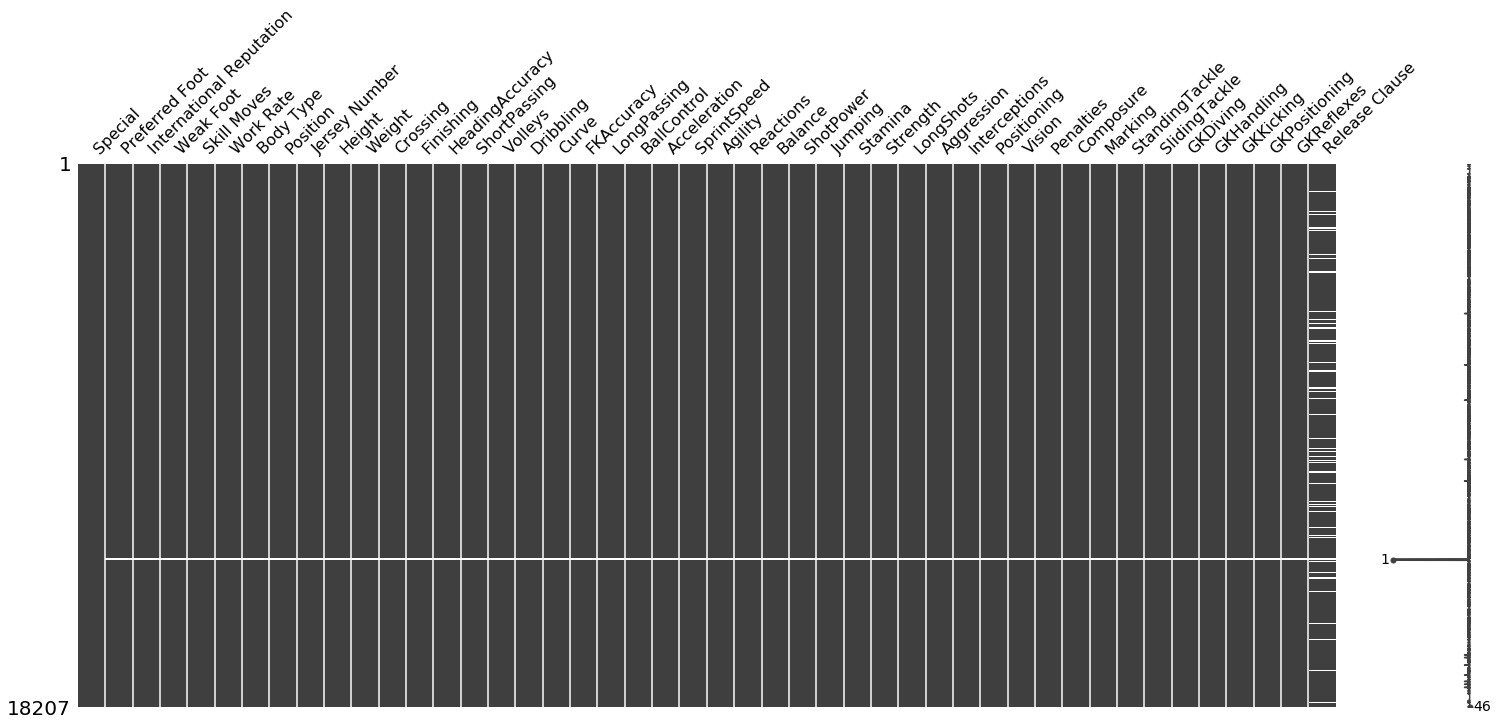

In [6]:
column_null = null[9:].index
msno.matrix(df[column_null])

Variables in which occurs missing data are often specific rows which has most of the data missing. That's why I'm going to drop these rows.

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Name                        0
Age                         0
Photo                       0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

**Feature enginnering need for visualization**

In [9]:
def dollar_to_number(df_value):
    try:
        value = float(df_value[1:-1])
        dollar = df_value[-1:]

        if dollar == 'M':
            value = value * 1000000
        elif dollar == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

def height_to_cm(df_value):
    try:
        feet = int(df_value[0])
        inch = int(df_value[2:])
        
        new_value = (feet*30.48)+(inch*2.54)
    except ValueError:
        new_value = 0
    return new_value

def weight_to_kg(df_value):
    try:
        lbs = int(df_value[:-3])
        
        new_value = lbs*0.453592
    except ValueError:
        new_value = 0
    return new_value

In [10]:
df['Value'] = df['Value'].apply(dollar_to_number)
df['Release Clause'] = df['Release Clause'].apply(dollar_to_number)
df['Wage'] = df['Wage'].apply(dollar_to_number)
df['CM'] = df['Height'].apply(height_to_cm)
df['KG'] = df['Weight'].apply(weight_to_kg)

#positions = {['ST', 'RW', 'LW', 'CF', 'LF', 'LS', 'RS', 'RF']:'Attacker',
            #['CAM', 'CM', 'LM', 'RM', 'CDM', 'RCM','LCM', 'LDM', 'RDM', 'LAM', 'RAM']:'Middlefielder',
             #['LWB', 'RWB', 'CB', 'RB', 'LB', 'LCB', 'RCB']:'Defender'}
df['Position_Cat'] = df['Position'].replace(['ST', 'RW', 'LW', 'CF', 'LF', 'LS', 'RS', 'RF'], 'Attacker')
df['Position_Cat'] = df['Position_Cat'].replace(['CAM', 'CM', 'LM', 'RM', 'CDM', 'RCM','LCM', 'LDM', 'RDM', 'LAM', 'RAM'], 'Middlefielder')
df['Position_Cat'] = df['Position_Cat'].replace(['LWB', 'RWB', 'CB', 'RB', 'LB', 'LCB', 'RCB'], 'Deffender')

In [11]:
field_players = df[df['Position'] != 'GK']
field_players.drop(columns=['GKDiving','GKHandling', 'GKKicking',
                            'GKPositioning', 'GKReflexes'], inplace=True)
goalkeepers = df[df['Position'] == 'GK']
cat_columns = df.select_dtypes(include='object')
numeric_columns = df.select_dtypes(exclude='object')
numeric_columns_field = field_players.select_dtypes(exclude='object')
numeric_columns_GK = goalkeepers.select_dtypes(exclude='object')

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



**Correlations heatmaps for field players and goalkeepers**

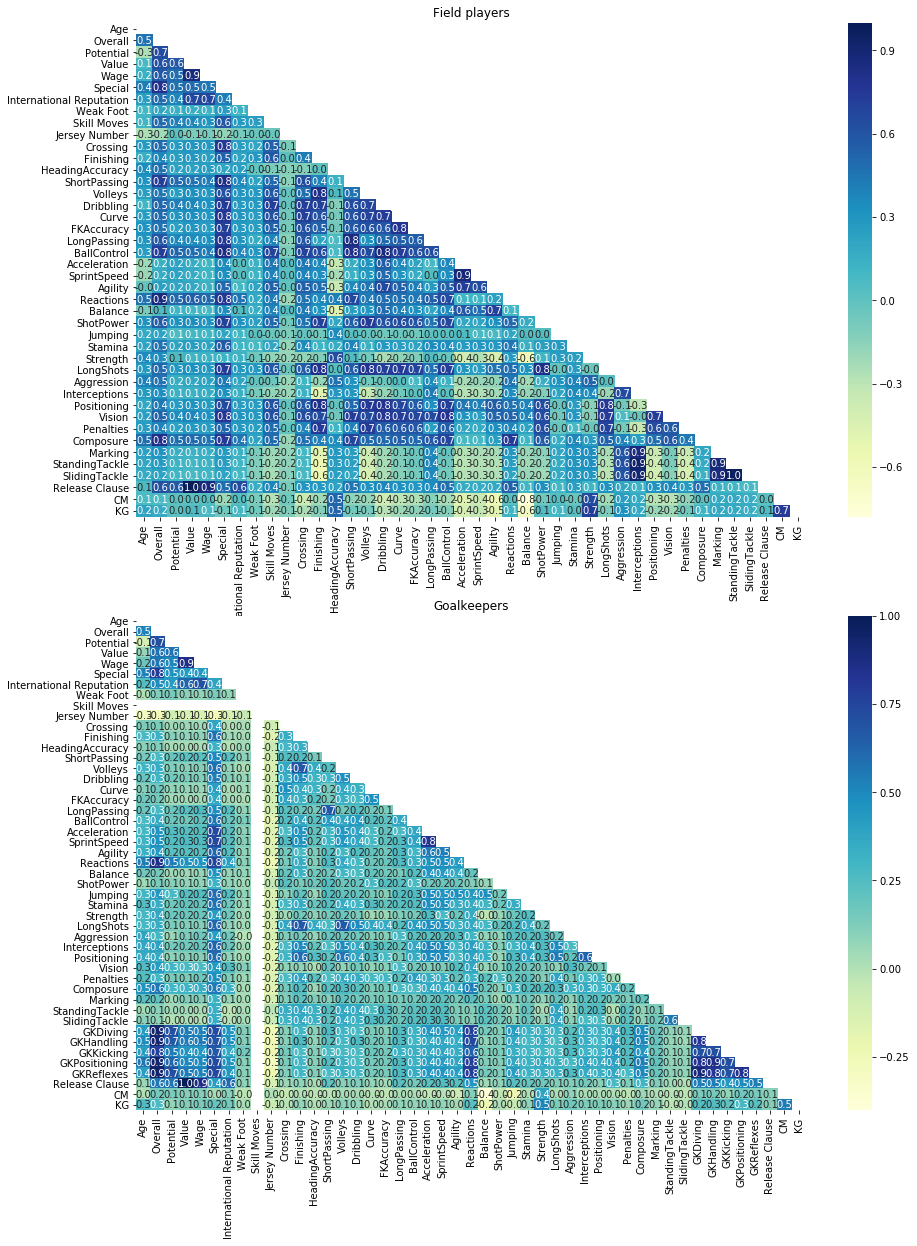

In [12]:
numeric_columns_field_corr = numeric_columns_field.corr()
numeric_columns_GK_corr = numeric_columns_GK.corr()
mask1 = np.zeros_like(numeric_columns_field_corr)
mask2 = np.zeros_like(numeric_columns_GK_corr)
mask1[np.triu_indices_from(mask1)] = True
mask2[np.triu_indices_from(mask2)] = True
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(211)
ax1.title.set_text('Field players')
sns.heatmap(numeric_columns_field_corr, cmap='YlGnBu', annot=True, fmt='.1f', mask=mask1)
ax2 = fig.add_subplot(212)
ax2.title.set_text('Goalkeepers')
sns.heatmap(numeric_columns_GK_corr, cmap='YlGnBu', annot=True, fmt='.1f', mask=mask2)

**Countries with most players**

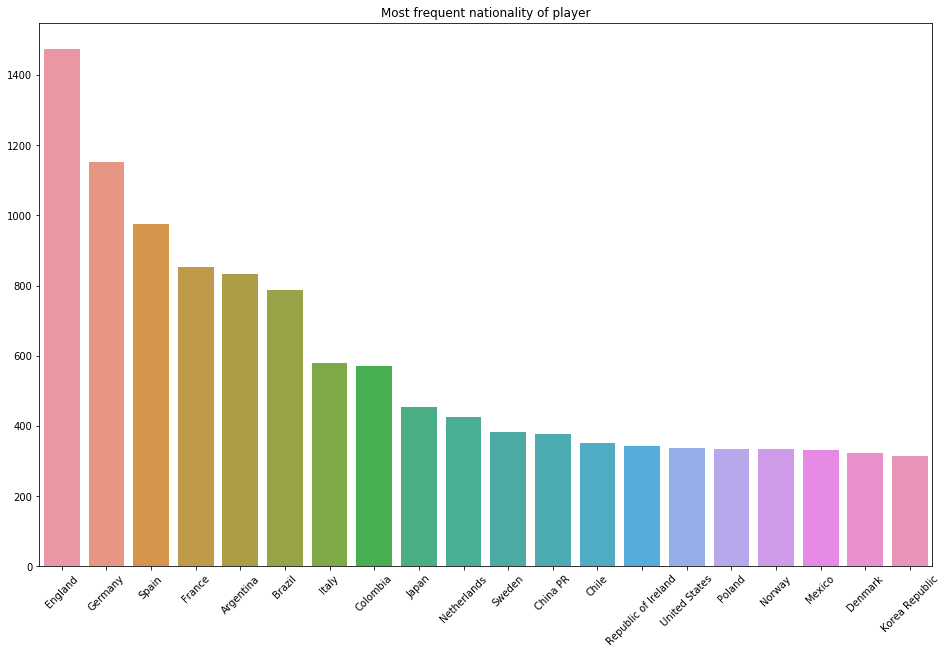

In [13]:
top_10 = df['Nationality'].value_counts()[:20]

plt.figure(figsize=(16,10))
sns.barplot(top_10.index, top_10.values)
plt.xticks(rotation=45)
plt.title('Most frequent nationality of player')
plt.show()

**Basic statistics**

Text(0.5, 1.0, 'Foot preferation')

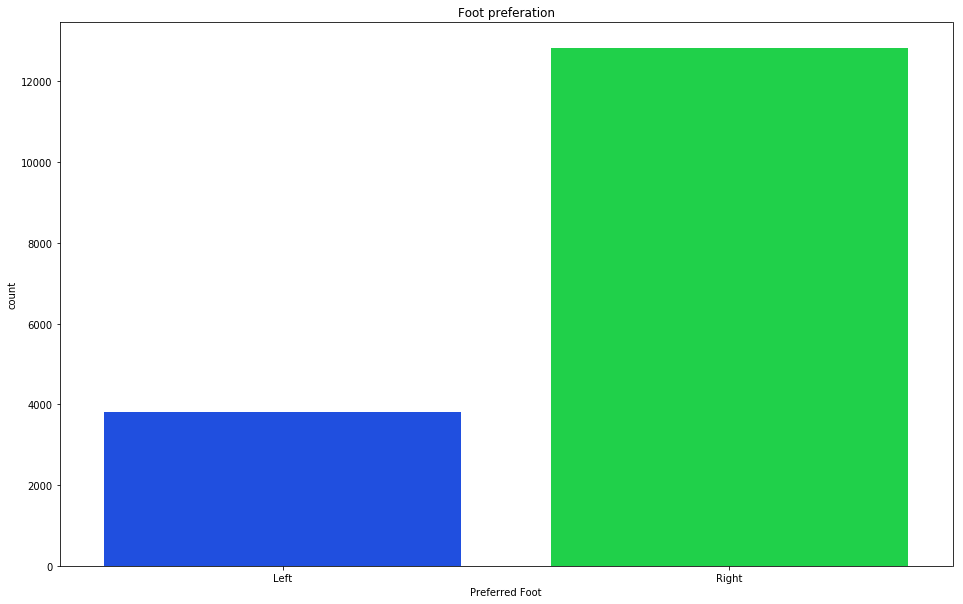

In [14]:
plt.figure(figsize=(16,10))
sns.countplot(x='Preferred Foot', data=df)
plt.title('Foot preferation')

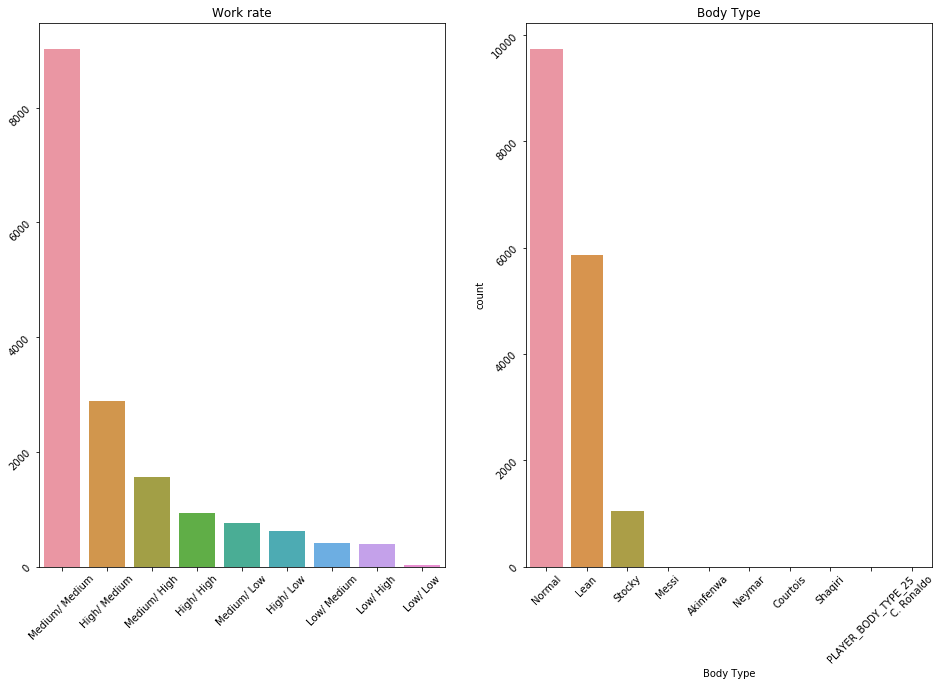

In [15]:
fix, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,10))
sns.barplot(x=df['Work Rate'].value_counts().index, y=df['Work Rate'].value_counts().values, data=df, ax=ax1)
ax1.tick_params(rotation=45)
ax1.title.set_text('Work rate')
sns.countplot(x='Body Type', data=df, ax=ax2, order=df['Body Type'].value_counts().index)
ax2.tick_params(rotation=45)
ax2.title.set_text('Body Type')

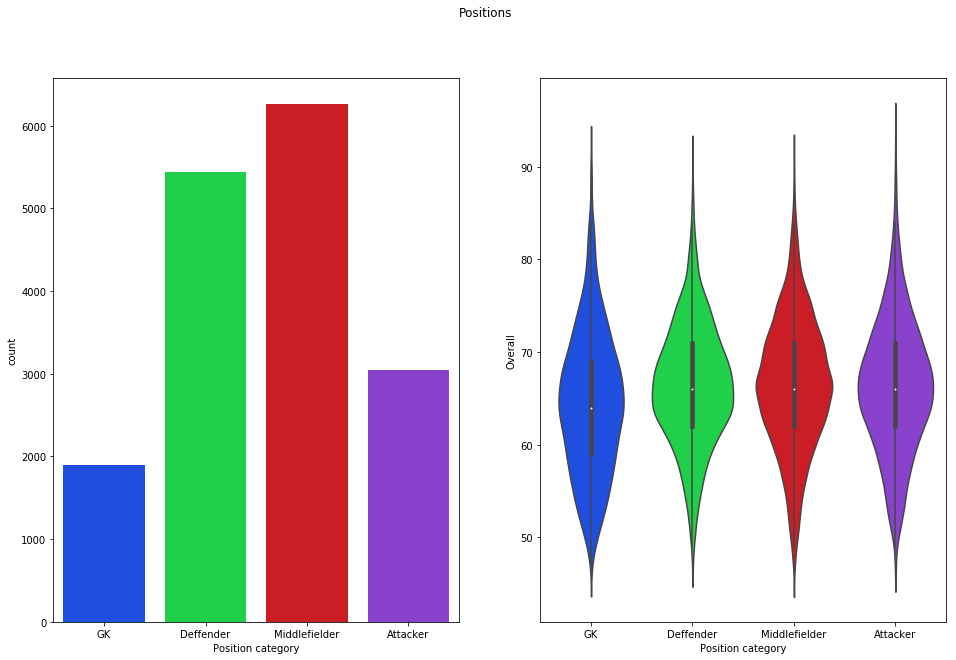

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))
sns.countplot(x='Position_Cat', data=df, ax=ax1, order=['GK', 'Deffender', 'Middlefielder', 'Attacker'])
sns.violinplot(x='Position_Cat', y='Overall', data=df, ax=ax2, order=['GK', 'Deffender', 'Middlefielder', 'Attacker'])
plt.suptitle('Positions')
ax1.set_xlabel('Position category')
ax2.set_xlabel('Position category')
plt.show()

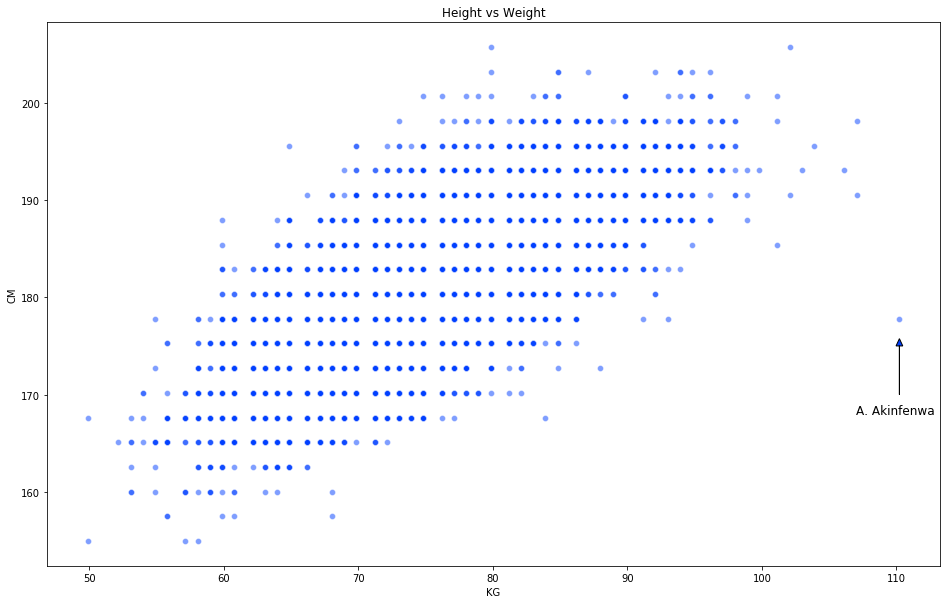

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(df['KG'], df['CM'], alpha=0.5)
plt.title('Height vs Weight')
plt.arrow(110.222856,170, 0, 5, head_width=0.5)
plt.annotate('A. Akinfenwa', (107, 168), fontsize=12)
plt.show()

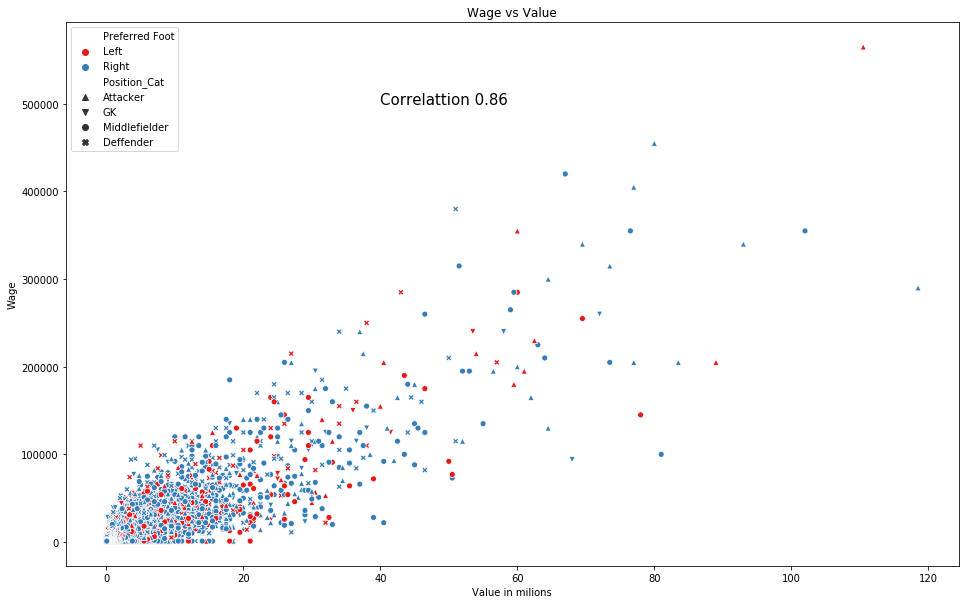

In [18]:
corr = round(df[['Value', 'Wage']].corr().iloc[1,0], 2)
plt.figure(figsize=(16,10))
sns.scatterplot(df['Value']/1000000, 'Wage', data=df, style='Position_Cat', hue='Preferred Foot', markers=['^','v', 'o','X'], palette='Set1')
plt.text(x=40,y=500000, s='Correlattion {}'.format(corr), fontsize=15)
plt.xlabel('Value in milions')
plt.title('Wage vs Value')
#plt.xlim(0,150)
#plt.ylim(0,600000)
plt.show()

**Top 10 clubs**

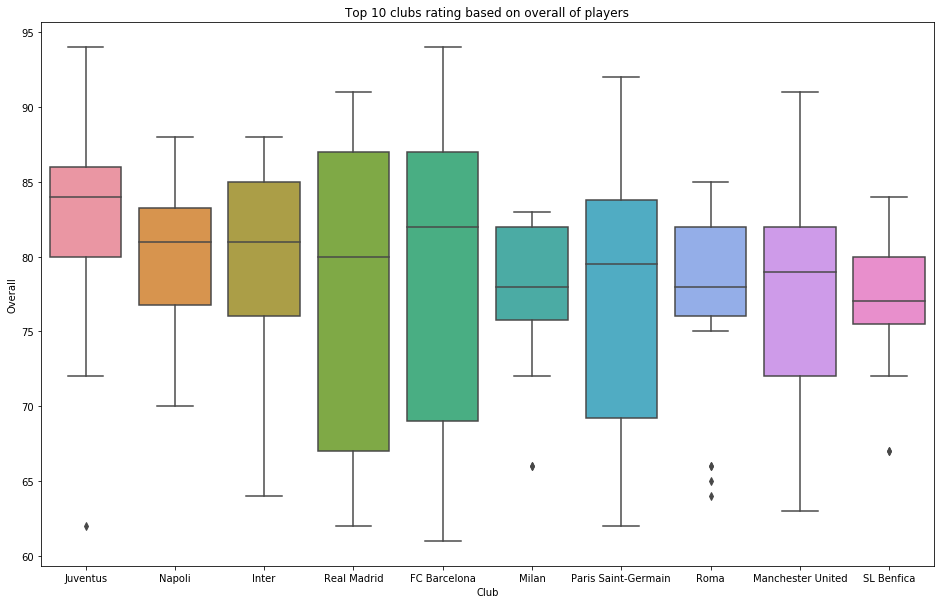

In [19]:
top_10_club = df.groupby(by='Club').mean()['Overall'].sort_values(ascending=False)[:10].index
df10 = df[df['Club'].isin(top_10_club)]
plt.figure(figsize=(16,10))
sns.boxplot(x='Club', y='Overall', data=df10, order=top_10_club)
plt.title('Top 10 clubs rating based on overall of players')
plt.show()

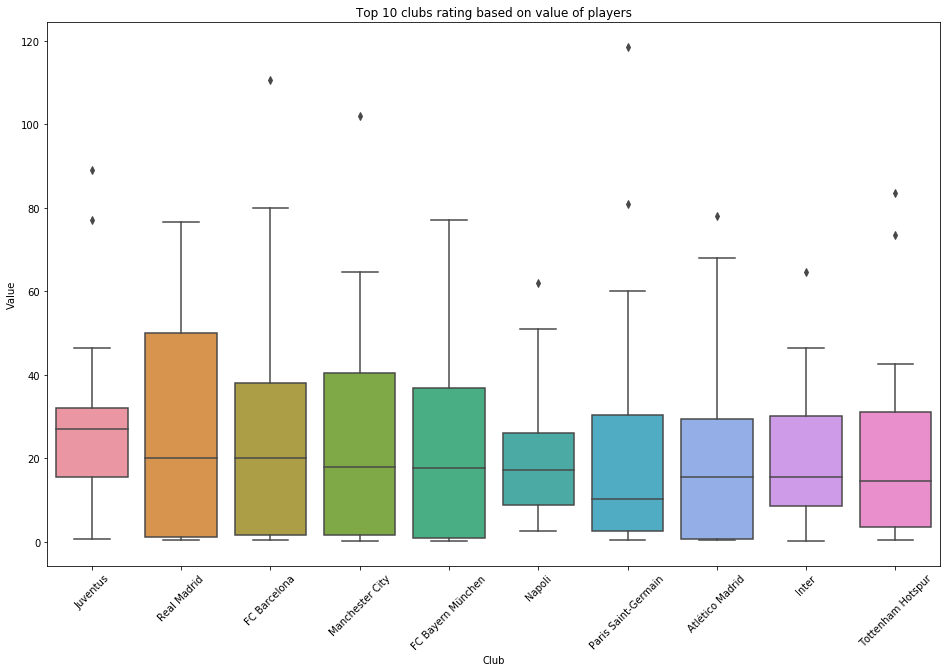

In [20]:
top_10_value = df.groupby(by='Club').mean()['Value'].sort_values(ascending=False)[:10].index
value10 = df[df['Club'].isin(top_10_value)]
plt.figure(figsize=(16,10))
sns.boxplot(x='Club', y=df['Value']/1000000, data=value10, order=top_10_value)
plt.title('Top 10 clubs rating based on value of players')
plt.xticks(rotation=45)
plt.show()

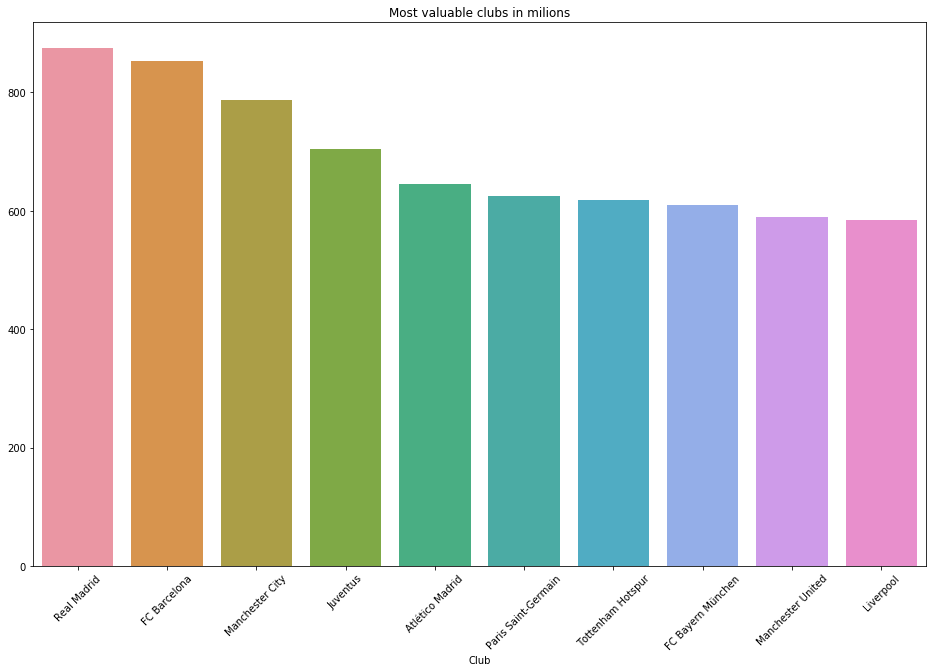

In [21]:
top_10_sum = df.groupby(by='Club').sum()['Value'].sort_values(ascending=False)[:10]
plt.figure(figsize=(16,10))
sns.barplot(top_10_sum.index, top_10_sum.values/1000000)
plt.title('Most valuable clubs in milions')
plt.xticks(rotation=45)
plt.show()

**Effect of jersey number**

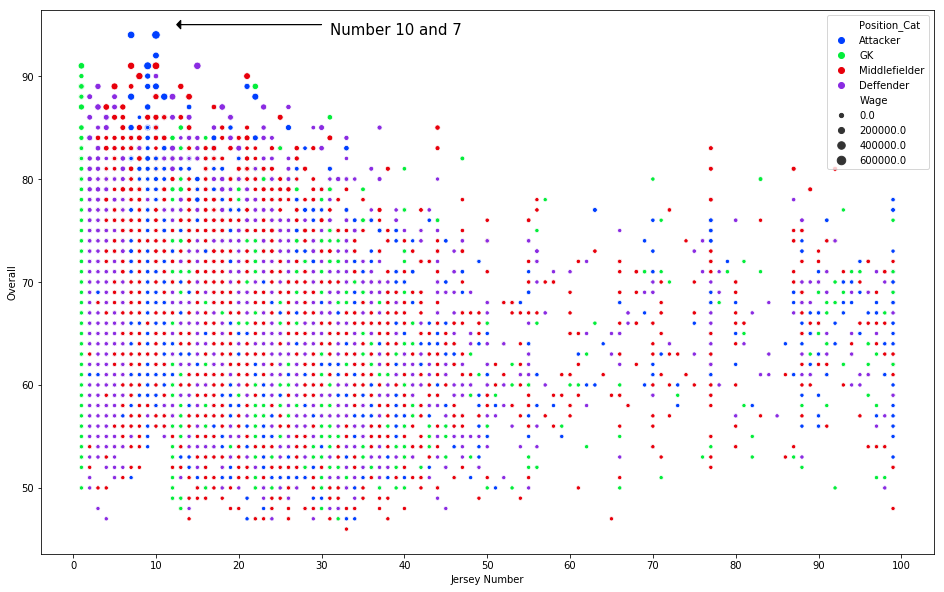

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(y='Overall', x='Jersey Number', data=df, hue='Position_Cat', size=df['Wage'])
plt.arrow(30, 95, -17, 0, head_width=0.85, head_length=0.5, fc='k', ec='k')
plt.annotate('Number 10 and 7', (31, 94), fontsize=15)
plt.xticks(np.linspace(0,100,11))
plt.show()

**Radar graphs**

In [23]:
data_sort = pd.DataFrame()
best_features = df[numeric_columns.columns].groupby(df['Position_Cat']).mean()
for i, j in zip(range(best_features.shape[0]), best_features.index):
    best_9 = best_features.iloc[i,:].sort_values(ascending=False)
    #print(best_9)
    data_sort[j] = best_9[:15].index
    
best_Attacker = ['SprintSpeed', 'Acceleration', 'Agility', 'Balance', 'ShotPower', 'Jumping']
best_GK = ['GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'GKKicking', 'Reactions']
best_Middlefielder = ['Balance', 'Agility', 'Acceleration', 'SprintSpeed', 'Stamina', 'ShortPassing']
best_Deffender = ['Strength', 'Jumping', 'Stamina', 'StandingTackle', 'Aggression', 'SlidingTackle']

labels = [best_Attacker,best_Middlefielder, best_Deffender, best_GK]

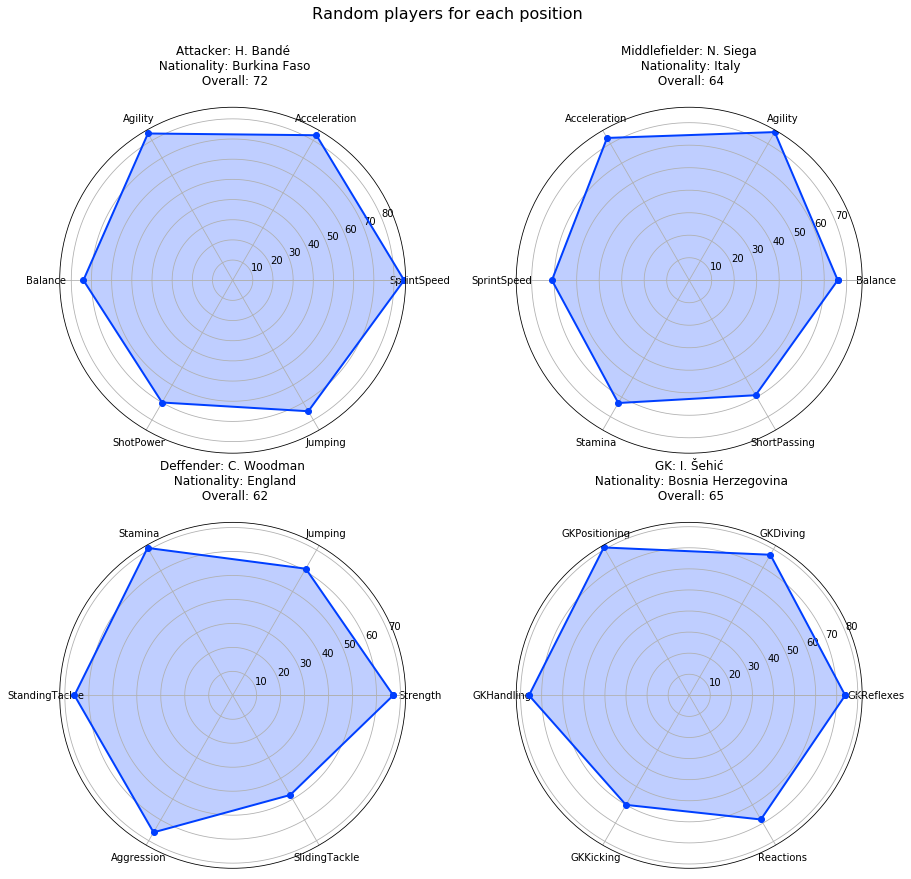

In [24]:
player_atk = df[df['Position_Cat'] == 'Attacker'][best_Attacker].sample(1)
player_def = df[df['Position_Cat'] == 'Deffender'][best_Deffender].sample(1)
player_gk = df[df['Position_Cat'] == 'GK'][best_GK].sample(1)
player_mid = df[df['Position_Cat'] == 'Middlefielder'][best_Middlefielder].sample(1)
#
stats1=player_atk.values.T
stats2=player_def.values.T
stats3=player_gk.values.T
stats4=player_mid.values.T
#
angles1=np.linspace(0, 2*np.pi, len(best_Attacker), endpoint=False)
angles2=np.linspace(0, 2*np.pi, len(best_Deffender), endpoint=False)
angles3=np.linspace(0, 2*np.pi, len(best_GK), endpoint=False)
angles4=np.linspace(0, 2*np.pi, len(best_Middlefielder), endpoint=False)
#
stats1=np.concatenate((stats1,[stats1[0]]))
stats2=np.concatenate((stats2,[stats2[0]]))
stats3=np.concatenate((stats3,[stats3[0]]))
stats4=np.concatenate((stats4,[stats4[0]]))
#
angles1=np.concatenate((angles1,[angles1[0]]))
angles2=np.concatenate((angles2,[angles2[0]]))
angles3=np.concatenate((angles3,[angles3[0]]))
angles4=np.concatenate((angles4,[angles4[0]]))
#
player = [player_atk, player_mid, player_def, player_gk]
angles = [angles1, angles2, angles3, angles4]
stats = [stats1, stats2, stats3, stats4]

fig  = plt.figure(figsize=(15,14))
for p, s in zip([0, 1, 2, 3],[1, 2, 3, 4]):
    ax = fig.add_subplot(2, 2, s, polar=True)
    ax.plot(angles[p], stats[p], 'o-', linewidth=2, label='Messi')
    ax.fill(angles[p], stats[p], alpha=0.25)
    ax.set_thetagrids(angles[p] * 180/np.pi, labels[p])
    ax.set_title(df.loc[player[p].index[0]]['Position_Cat'] + ': ' + df.loc[player[p].index[0]]['Name']
                 + '\n Nationality: ' + df.loc[player[p].index[0]]['Nationality']
                 + '\n Overall: ' + np.str(df.loc[player[p].index[0]]['Overall'])
                )
    fig.suptitle('Random players for each position', fontsize=16)

**3D Scatter**

In [25]:
def scatter_3d(x, y, z):
    """Choose X, Y, Z."""
    trace1 = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=12,
            color=z,                
            colorscale='Viridis',  
            opacity=0.8

        ),text=df['Name']
    )

    data = [trace1]
    layout = go.Layout(
        scene=dict(
        xaxis=dict(
            title=x.name),
        yaxis=dict(
            title=y.name),
        zaxis=dict(
            title=z.name)),
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='3d-scatter-colorscale')

In [26]:
scatter_3d(df['Value'], df['Wage'], df['Overall'])

**Finding similar player**

In [27]:
def find_player(c, player):
    sc = StandardScaler()
    pos = df[df['Name'] == player]['Position_Cat'].values[0]
    base_data = df[df['Position_Cat'] == pos].reset_index(drop=True)
    base_scales = sc.fit_transform(base_data[col_to_cluster])
    base = pd.DataFrame(columns=col_to_cluster, data=base_scales)
    
    kmeans = KMeans(n_clusters=c, random_state=1)
    k = kmeans.fit_predict(base[col_to_cluster])
    pred = pd.concat([base_data[col_to_cluster], base_data['Name'], base_data['Overall'],
                      pd.Series(k).rename('Cluster')], axis=1)
    pred['Cluster'] = pred['Cluster'].astype('category')
    
    player_predict = pred[pred['Name'] == player]['Cluster']
    
    top_5_similar = pred[pred['Cluster'] == player_predict.values[0]]
    top_5_similar = top_5_similar.sort_values(by='Overall', ascending=False)
    
    print(top_5_similar[:5])
    
    fig, ax = plt.subplots(figsize=(16,10))
    x = np.array(pred[col_to_cluster[0]])
    y = np.array(pred[col_to_cluster[1]])
    cluster = np.array(pred['Cluster'])
    for g in np.unique(cluster):
        i = np.where(cluster == g)
        ax.scatter(x[i], y[i], label=g)
        
    ax.legend()
    plt.xlabel(col_to_cluster[0])
    plt.ylabel(col_to_cluster[1])
    plt.show()
    
    return pred
    
    


    Stamina  Strength        Name  Overall Cluster
0      72.0      59.0    L. Messi       94       2
2      81.0      49.0   Neymar Jr       92       2
10     75.0      44.0  L. Insigne       88       2
11     70.0      59.0        Isco       88       2
17     75.0      42.0  D. Mertens       87       2


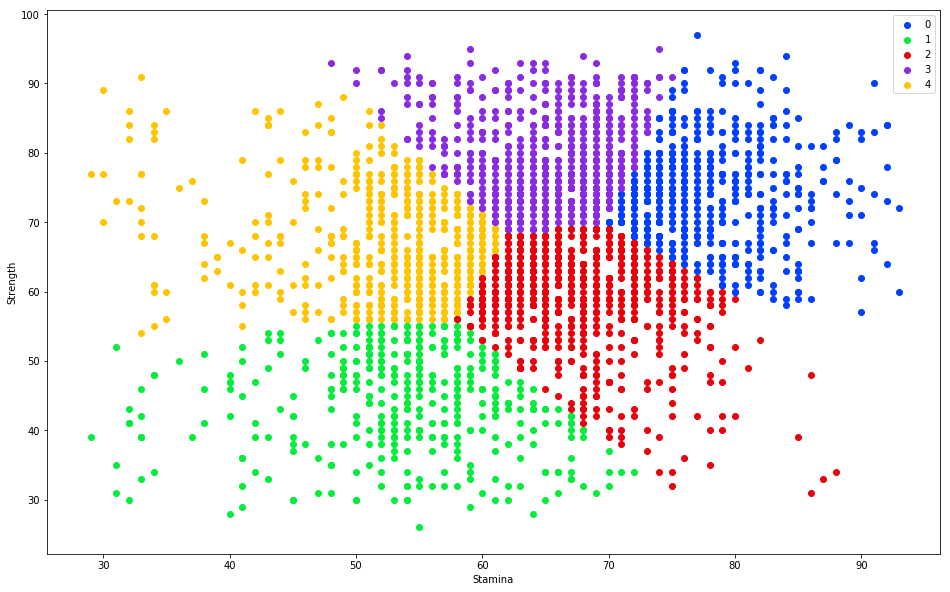

In [28]:
col_to_cluster = ['Stamina', 'Strength']

pred = find_player(5, 'L. Messi')